C:\Users\cadyw\AppData\Local\Temp\ipykernel_4340\1508957681.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['dt'] = pd.to_datetime(df_filtered['dt'])


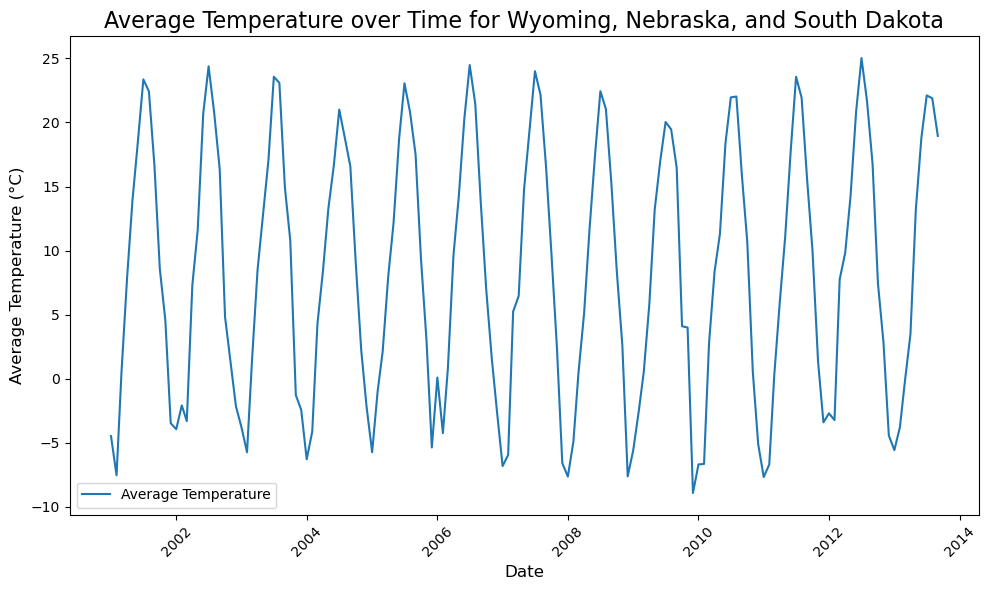

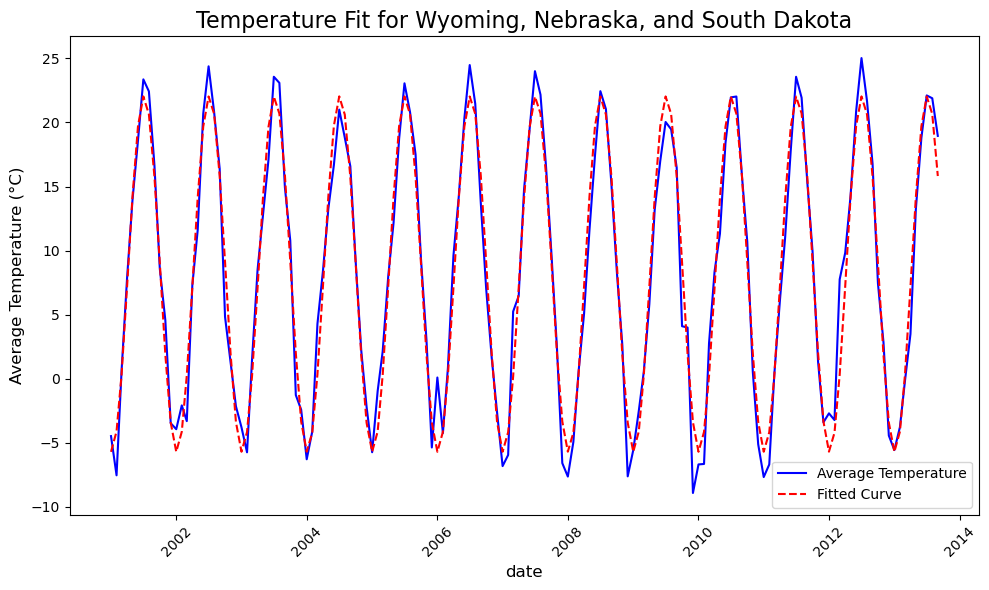

Parameter 1: 13.898335720500059 +/- 0.22650023008055561
Parameter 2: 0.017201601462705073 +/- 1.2289007260606521e-05
Parameter 3: -1.6172914189395247 +/- 0.032814817686046986
Parameter 4: 8.174924069799333 +/- 0.16069847310131524
The fitted equation is: 13.90 * sin(0.0172 * x + -1.62) + 8.17


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv(r"C:\Users\cadyw\Downloads\GlobalLandTemperaturesByState.csv")
df_filtered = df[['dt', 'AverageTemperature', 'State']]
df_filtered['dt'] = pd.to_datetime(df_filtered['dt'])
df_filtered = df_filtered[df_filtered['dt'].dt.year > 2000]
df_filtered = df_filtered[df_filtered['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]

df_avg_temp = df_filtered.groupby('dt')['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_avg_temp['dt'], df_avg_temp['AverageTemperature'], label='Average Temperature')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Average Temperature over Time for Wyoming, Nebraska, and South Dakota', fontsize=16)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

df_avg_temp['date_num'] = (df_avg_temp['dt'] - df_avg_temp['dt'].min()).dt.days

def model(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

initial_guess = [5, 2 * np.pi / 365, 0, 10]
popt, pcov = curve_fit(model, df_avg_temp['date_num'], df_avg_temp['AverageTemperature'], p0=initial_guess)

plt.figure(figsize=(10, 6))
plt.plot(df_avg_temp['dt'], df_avg_temp['AverageTemperature'], label='Average Temperature', color='blue')
plt.plot(df_avg_temp['dt'], model(df_avg_temp['date_num'], *popt), label='Fitted Curve', color='red', linestyle='--')
plt.xlabel('date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.title('Temperature Fit for Wyoming, Nebraska, and South Dakota', fontsize=16)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

param_errors = np.sqrt(np.diag(pcov))
for i, param in enumerate(popt):
    print(f"Parameter {i+1}: {param} +/- {param_errors[i]}")

A, B, C, D = popt
print(f"The fitted equation is: {A:.2f} * sin({B:.4f} * x + {C:.2f}) + {D:.2f}")